## 1. Understanding Data

In [ ]:
import os
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings(action='ignore')

### Before Start
본격적으로 시작하기 전에 데이터에 대해서 아주 약간만 깊이 있게 이해해보는 시간을 가져보려고 합니다.

### Q. 디스크의 CSV파일의 용량은 그렇게 높진 않은데 메모리로 읽기만 하면 몇 배로 늘어나는 이유는?
캐글을 하시다 보면 이런 경험이 한번쯤은 다들 있으실 것 같습니다.   
분명히 CSV 파일로는 1GB 보다 아래였는데 판다스로 read를 하면 2~3GB로 늘어나는 경우가 종종 있는데, 이유가 무엇일까요?

In [ ]:
## Toxic competition data load
# PATH = '../input/jigsaw-unintended-bias-in-toxicity-classification'

In [ ]:
# os.listdir('PATH')

In [ ]:
# toxic_train = pd.read_csv(os.path.join(PATH, 'train.csv'))
# # toxic_train = pd.read_csv('../input/jigsaw-unintended-bias-in-toxicity-classification/train.csv')
# toxic_train.info()

### Load data

In [ ]:
# PATH = '../input/kakr-4th-competition/'
# train = pd.read_csv(PATH + 'train.csv')
# test  = pd.read_csv(PATH + 'test.csv')

train = pd.read_csv('~/Downloads/kakr-4th-competition/train.csv')
test = pd.read_csv('~/Downloads/kakr-4th-competition/test.csv')

### 데이터 확인

* id
* age : 나이
* workclass : 고용 형태
* fnlwgt : 사람 대표성을 나타내는 가중치 (final weight의 약자)
* education : 교육 수준
* education_num : 교육 수준 수치
* marital_status: 결혼 상태
* occupation : 업종
* relationship : 가족 관계
* race : 인종
* sex : 성별
* capital_gain : 양도 소득
* capital_loss : 양도 손실
* hours_per_week : 주당 근무 시간
* native_country : 국적
* income : 수익 (예측해야 하는 값)
    * \>50K : 1
    * <=50K : 0

In [ ]:
train.head()
train.sample(10) #임의의 테이블을 추출함 

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
8054,8054,37,Private,361888,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,10520,0,40,United-States,>50K
24615,24615,38,Private,32916,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,<=50K
20001,20001,24,Private,201680,HS-grad,9,Never-married,Adm-clerical,Unmarried,White,Male,0,0,60,United-States,<=50K
22094,22094,25,Private,178478,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,40,United-States,<=50K
3911,3911,44,Private,33155,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,45,United-States,<=50K
11050,11050,61,Self-emp-inc,119986,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States,<=50K
19630,19630,56,Private,81220,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,Canada,<=50K
25041,25041,43,Private,174575,Bachelors,13,Divorced,Exec-managerial,Not-in-family,White,Male,0,1564,45,United-States,>50K
13724,13724,23,Local-gov,314819,HS-grad,9,Never-married,Transport-moving,Own-child,White,Male,0,0,40,United-States,<=50K
25700,25700,34,Private,195136,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,1887,40,United-States,>50K


### Pandas 라이브러리
Pandas 라이브러리에서 많이 쓰이는 것들을 위주로 살펴보도록 하겠습니다.

loc, iloc, info, describe, value_counts, head, tail, sample, map, apply, groupby 등

In [ ]:
## 판다스 사용 팁
train.describe()

,id,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,26049.000000,26049.000000,2.604900e+04,26049.000000,26049.00000,26049.000000,26049.000000
mean,13024.000000,38.569235,1.903045e+05,10.088372,1087.68970,87.732734,40.443126
std,7519.842917,13.671489,1.059663e+05,2.567610,7388.85469,403.230205,12.361850
min,0.000000,17.000000,1.376900e+04,1.000000,0.00000,0.000000,1.000000
25%,6512.000000,28.000000,1.181080e+05,9.000000,0.00000,0.000000,40.000000
50%,13024.000000,37.000000,1.788660e+05,10.000000,0.00000,0.000000,40.000000
75%,19536.000000,48.000000,2.377350e+05,12.000000,0.00000,0.000000,45.000000
max,26048.000000,90.000000,1.484705e+06,16.000000,99999.00000,4356.000000,99.000000


In [ ]:
# 시리즈와 데이터프레임별로 다른 함수를 써야함
# 예약어와 컬럼명이 동일한 경우에는 []로 써야함 
print(type(train.native_country))
train.native_country.value_counts()

<class 'pandas.core.series.Series'>


United-States                 23371
Mexico                          534
?                               456
Philippines                     163
Germany                         101
Puerto-Rico                      95
Canada                           92
El-Salvador                      79
India                            77
Cuba                             76
England                          67
Jamaica                          64
South                            63
China                            57
Guatemala                        52
Columbia                         52
Vietnam                          50
Italy                            50
Dominican-Republic               48
Poland                           47
Japan                            47
Taiwan                           39
Haiti                            35
Iran                             35
Portugal                         30
Nicaragua                        28
Peru                             26
Greece                      

In [ ]:
train.workclass.value_counts()

Private             18123
Self-emp-not-inc     2030
Local-gov            1692
?                    1502
State-gov            1043
Self-emp-inc          877
Federal-gov           765
Without-pay            11
Never-worked            6
Name: workclass, dtype: int64

In [ ]:
train.capital_gain.describe()

count    26049.00000
mean      1087.68970
std       7388.85469
min          0.00000
25%          0.00000
50%          0.00000
75%          0.00000
max      99999.00000
Name: capital_gain, dtype: float64

In [ ]:
train.capital_gain > 9999

0        False
1        False
2        False
3        False
4        False
         ...  
26044    False
26045    False
26046    False
26047    False
26048    False
Name: capital_gain, Length: 26049, dtype: bool

In [ ]:
# loc의 조건문이 true, false 의 형태로 출력되면 다 가능 
# train.loc[train.capital_gain == 99999, : 'age']

train.loc[train.race =='White', : ]

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States,<=50K
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,<=50K
3,3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,25,United-States,<=50K
6,6,43,State-gov,206139,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,50,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26042,26042,48,Self-emp-not-inc,191389,Some-college,10,Separated,Sales,Unmarried,White,Female,0,0,50,United-States,<=50K
26044,26044,57,Private,250201,11th,7,Married-civ-spouse,Other-service,Husband,White,Male,0,0,52,United-States,<=50K
26045,26045,23,Private,238092,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
26046,26046,78,?,165694,Masters,14,Widowed,?,Not-in-family,White,Female,0,0,15,United-States,<=50K


In [ ]:
x = '>50K'
x== '50K'

False

In [ ]:
# 데이터 변환 : map 사용하기(시리즈 함수임) 함수/조건을 적용하여 바로 변환시키 임
# 비슷한 apply 는 df 에 사용함 
train.income = train.income.map(lambda x: int(x=='>50K')) # 블린추출하여 0, 1로 변환 
train

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,1
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States,0
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,0
3,3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,25,United-States,0
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,20,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26044,26044,57,Private,250201,11th,7,Married-civ-spouse,Other-service,Husband,White,Male,0,0,52,United-States,0
26045,26045,23,Private,238092,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,0
26046,26046,78,?,165694,Masters,14,Widowed,?,Not-in-family,White,Female,0,0,15,United-States,0
26047,26047,26,Self-emp-not-inc,151626,HS-grad,9,Never-married,Prof-specialty,Own-child,Black,Female,0,0,40,United-States,0


In [ ]:
train.apply(lambda x : x['age']+ x['hours_per_week'], axis=1)
# axis는 축을 나타냄. train.shape를 기준으로 두개의 축을 나누는데, 컬럼의 경우 axis를 1로 설정한다. 

0        100
1         37
2         34
3         46
4         44
        ... 
26044    109
26045     63
26046     93
26047     66
26048     50
Length: 26049, dtype: int64

In [ ]:
train.income.plot(kind='pie')

<AxesSubplot:ylabel='Frequency'>

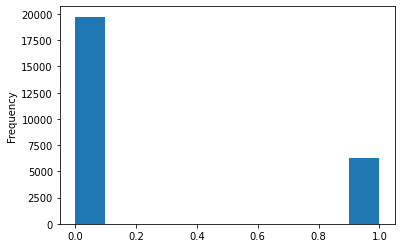

In [ ]:
train.income.plot(kind='hist')

## 2. Data Preprocessing

### 2.1 결측치 처리

In [ ]:
train.isna().sum()

id                0
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [ ]:
train[train.apply(lambda x: "?" in list(x), axis=1)] # fearture에 ?가 포함된 row 만 추출 

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,20,?,0
11,11,21,?,204226,Some-college,10,Never-married,?,Unmarried,White,Female,0,0,35,United-States,0
30,30,20,?,202994,Some-college,10,Never-married,?,Own-child,White,Female,0,0,16,United-States,0
34,34,31,?,505438,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,30,Mexico,0
66,66,67,?,39100,HS-grad,9,Married-civ-spouse,?,Wife,White,Female,0,0,5,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26009,26009,73,?,89852,1st-4th,2,Married-civ-spouse,?,Husband,White,Male,0,0,40,Portugal,0
26010,26010,63,?,321403,9th,5,Separated,?,Not-in-family,Black,Male,0,0,40,United-States,0
26012,26012,36,?,214896,9th,5,Divorced,?,Unmarried,White,Female,0,0,40,Mexico,0
26046,26046,78,?,165694,Masters,14,Widowed,?,Not-in-family,White,Female,0,0,15,United-States,0


In [ ]:
train.workclass.value_counts()

Private             18123
Self-emp-not-inc     2030
Local-gov            1692
?                    1502
State-gov            1043
Self-emp-inc          877
Federal-gov           765
Without-pay            11
Never-worked            6
Name: workclass, dtype: int64

In [ ]:
train.occupation.value_counts()

Prof-specialty       3304
Craft-repair         3262
Exec-managerial      3246
Sales                2998
Adm-clerical         2983
Other-service        2626
Machine-op-inspct    1582
?                    1508
Transport-moving     1270
Handlers-cleaners    1092
Farming-fishing       784
Tech-support          742
Protective-serv       522
Priv-house-serv       123
Armed-Forces            7
Name: occupation, dtype: int64

### 결측치 처리
삭제? 대치?

결측치 대치의 경우 overffiing의 문제가 있을 수 있음.
데이터 자체가 많으면 문제되지 않음

outlier 처리 방법
-삭제,대치, 로그 변환(log transformation)

In [ ]:
train[(train['workclass'] == '?')&(train['occupation'] == '?')]

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
11,11,21,?,204226,Some-college,10,Never-married,?,Unmarried,White,Female,0,0,35,United-States,0
30,30,20,?,202994,Some-college,10,Never-married,?,Own-child,White,Female,0,0,16,United-States,0
34,34,31,?,505438,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,30,Mexico,0
66,66,67,?,39100,HS-grad,9,Married-civ-spouse,?,Wife,White,Female,0,0,5,United-States,0
67,67,65,?,404601,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,2414,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26009,26009,73,?,89852,1st-4th,2,Married-civ-spouse,?,Husband,White,Male,0,0,40,Portugal,0
26010,26010,63,?,321403,9th,5,Separated,?,Not-in-family,Black,Male,0,0,40,United-States,0
26012,26012,36,?,214896,9th,5,Divorced,?,Unmarried,White,Female,0,0,40,Mexico,0
26046,26046,78,?,165694,Masters,14,Widowed,?,Not-in-family,White,Female,0,0,15,United-States,0


In [ ]:
train[(train['workclass'] != '?')&(train['occupation'] == '?')]

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
7929,7929,17,Never-worked,237272,10th,6,Never-married,?,Own-child,White,Male,0,0,30,United-States,0
8698,8698,18,Never-worked,157131,11th,7,Never-married,?,Own-child,White,Female,0,0,10,United-States,0
13008,13008,18,Never-worked,153663,Some-college,10,Never-married,?,Own-child,White,Male,0,0,4,United-States,0
15076,15076,20,Never-worked,462294,Some-college,10,Never-married,?,Own-child,Black,Male,0,0,40,United-States,0
17531,17531,18,Never-worked,206359,10th,6,Never-married,?,Own-child,White,Male,0,0,40,United-States,0
24153,24153,23,Never-worked,188535,7th-8th,4,Divorced,?,Not-in-family,White,Male,0,0,35,United-States,0


In [ ]:
train[(train['workclass'] == '?')&(train['occupation'] != '?')]

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income


In [ ]:
train.native_country.value_counts()

United-States                 23371
Mexico                          534
?                               456
Philippines                     163
Germany                         101
Puerto-Rico                      95
Canada                           92
El-Salvador                      79
India                            77
Cuba                             76
England                          67
Jamaica                          64
South                            63
China                            57
Guatemala                        52
Columbia                         52
Vietnam                          50
Italy                            50
Dominican-Republic               48
Poland                           47
Japan                            47
Taiwan                           39
Haiti                            35
Iran                             35
Portugal                         30
Nicaragua                        28
Peru                             26
Greece                      

In [ ]:
train.loc[(train.age >= 30) & (train.workclass =='?'), 'workclass'] = 'No'
train.workclass.value_counts()

Private             18123
Self-emp-not-inc     2030
Local-gov            1692
State-gov            1043
Self-emp-inc          877
No                    868
Federal-gov           765
?                     634
Without-pay            11
Never-worked            6
Name: workclass, dtype: int64

### Null check 관련 팁
데이터를 일일이 다 확인하지 않고 결측치가 있는지 확인하는 방법은?

In [ ]:
train.info()
# null 값을 포함하는 컬럼은 dtype이 float타입인 경우가 많다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26049 entries, 0 to 26048
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              26049 non-null  int64 
 1   age             26049 non-null  int64 
 2   workclass       26049 non-null  object
 3   fnlwgt          26049 non-null  int64 
 4   education       26049 non-null  object
 5   education_num   26049 non-null  int64 
 6   marital_status  26049 non-null  object
 7   occupation      26049 non-null  object
 8   relationship    26049 non-null  object
 9   race            26049 non-null  object
 10  sex             26049 non-null  object
 11  capital_gain    26049 non-null  int64 
 12  capital_loss    26049 non-null  int64 
 13  hours_per_week  26049 non-null  int64 
 14  native_country  26049 non-null  object
 15  income          26049 non-null  int64 
dtypes: int64(8), object(8)
memory usage: 3.2+ MB


In [ ]:
# f string 사용하기 f"{}"

a = 2/7
f"a 값은 : {a:.30f}"  # floating point가 넘어가면, 컴퓨터는 임의의수로 나머지를 매꾸기때문에 
# float 변수를 sort하는 경우에 값이 계속 바뀌면서 순서가 바뀔수 있음. 

'a 값은 : 0.285714285714285698425385362498'

### 2.2 이상치 처리
수치형 데이터에 이상한 값이 없는지 한번 확인해보도록 하겠습니다.

In [ ]:
train.describe()

,id,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income
count,26049.000000,26049.000000,2.604900e+04,26049.000000,26049.00000,26049.000000,26049.000000,26049.000000
mean,13024.000000,38.569235,1.903045e+05,10.088372,1087.68970,87.732734,40.443126,0.242044
std,7519.842917,13.671489,1.059663e+05,2.567610,7388.85469,403.230205,12.361850,0.428329
min,0.000000,17.000000,1.376900e+04,1.000000,0.00000,0.000000,1.000000,0.000000
25%,6512.000000,28.000000,1.181080e+05,9.000000,0.00000,0.000000,40.000000,0.000000
50%,13024.000000,37.000000,1.788660e+05,10.000000,0.00000,0.000000,40.000000,0.000000
75%,19536.000000,48.000000,2.377350e+05,12.000000,0.00000,0.000000,45.000000,0.000000
max,26048.000000,90.000000,1.484705e+06,16.000000,99999.00000,4356.000000,99.000000,1.000000


In [ ]:
train.loc[train.capital_gain== 99999, 'income'].sum()

127

In [ ]:
pd.Series.sort_values?

In [ ]:
train.loc[train.capital_gain< 99999].sort_values('capital_gain', ascending=False)

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
13280,13280,27,Private,211032,Preschool,1,Married-civ-spouse,Farming-fishing,Other-relative,White,Male,41310,0,24,Mexico,0
12625,12625,19,Private,188815,HS-grad,9,Never-married,Other-service,Own-child,White,Female,34095,0,20,United-States,0
2893,2893,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,0
17707,17707,20,?,273701,Some-college,10,Never-married,?,Other-relative,Black,Male,34095,0,10,United-States,0
4703,4703,55,Self-emp-not-inc,145574,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Male,34095,0,60,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9047,9047,48,Private,180446,10th,6,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,0,0,40,United-States,0
9046,9046,28,Private,273269,Some-college,10,Never-married,Craft-repair,Not-in-family,Black,Male,0,0,40,United-States,0
9045,9045,36,Self-emp-not-inc,34180,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,70,United-States,1
9044,9044,23,?,283806,9th,5,Divorced,?,Not-in-family,White,Female,0,0,35,United-States,0


### log 표현

In [ ]:
train.capital_gain.map(lambda x: np.log(x, where=(x!=0))).describe()

count    26049.000000
mean         0.743290
std          2.468766
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.512915
Name: capital_gain, dtype: float64

In [ ]:
train['log_capital_gain']= train.capital_gain.map(lambda x : np.log(x, where=(x!=0)))

train[['capital_gain', 'log_capital_gain']].describecribe()

AttributeError: 'DataFrame' object has no attribute 'describecribe'

### 2.3 Scaling

Min-max Scaler: (정규화 Normalization)
범위가 정해진 값이 필요할 때  
아웃라이어에 민감함
-최대가 1, 최소가 0 (0부터 1사이의 범위를 출력, 음수가 없음)

  
Standard Scaler: (표준화 Standardizaton)
평균을 0, 표준편차를 1로 맞추어 정규분포의 특성을 가지도록 만듦  
아웃라이어에 영향을 덜 받음

스케일링은 뭘 쓰야할까? 정답은 없다. 둘다 해보야지

### Data leakage(데이터 누수)

test data는 미래의 데이터라고 가정하며, 미래 데이터는 아직 일어나지 않은 데이터이므로, test데이터를 쓰는 것 자체가 데이터 누수를 일으킨다. 
오버피팅의 가능성을 고려하여 일반화를 신경쓴다. 따라서 스케일은 train에만 fit하고, test 데이터에는 transform 한다. 

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

mm_scaler = MinMaxScaler()
st_scaler = StandardScaler()

# fit 적용해서 통계치를 구한다. fit을 할때 통계치가 갱신되기 떄문에, 두가지 스케일 방법을 순차적으로 사용할수 있다. 
# transform 결과를 출력한다.

In [ ]:
mm_scaler.fit_transform(train['fnlwgt'].values.reshape(-1,1))

In [ ]:
print(train['fnlwgt'].values)
train['fnlwgt'].values.shape

In [ ]:
print(mm_scaler.data_max_)
print(mm_scaler.data_min_)

In [ ]:
train['MM_fnlwgt'] = mm_scaler.fit_transform(train['fnlwgt'].values.reshape(-1,1))
test['MM_fnlwgt'] = mm_scaler.transform(test['fnlwgt'].values.reshape(-1,1))

train['MM_age'] = mm_scaler.fit_transform(train['age'].values.reshape(-1,1))
test['MM_age'] = mm_scaler.transform(test['age'].values.reshape(-1,1))

train['ST_fnlwgt'] = st_scaler.fit_transform(train['fnlwgt'].values.reshape(-1,1))
test['ST_fnlwgt'] = st_scaler.transform(test['fnlwgt'].values.reshape(-1,1))

train['ST_age'] = st_scaler.fit_transform(train['age'].values.reshape(-1,1))
test['ST_age'] = st_scaler.transform(test['age'].values.reshape(-1,1))

In [ ]:
train.describe()[['MM_fnlwgt', 'MM_age']]

In [ ]:
train.describe()[['ST_fnlwgt', 'ST_age']].round(6)

## 3. Feature Engineering

### 3.1 변수의 종류
변수 종류에 따라서 어떤 차이점이 있는지 살펴봅시다.

모든 데이터를 설명할 수 있는 독립변수. 

domain knowledge(기초 데이터에 대한 이해)를 사용하여 한다. 

In [ ]:
train

### 3.2 인코딩
알고리즘이 이해하기 어려운 Feature들을 어떻게 처리할 지 알아봅시다

컴퓨터가 이해하는 데이터와 현실의 데이터가 모양은 같으나 의미가 다르고, 상황에 따라 순서나 세기가 바뀐다. 

- one-hot encoding: 카테고리형 변수에 사용, 변수별 상관관계가 없을 때 사용한다. 

- label encoding : 범주형 변수에서 순서가 있는 변수에 대해 사용. 

- mean encoding : target값의 비율(분포)를 바탕으로 특정 값을 매핑한다. (정보 자체로 대치한다.)
    * 오버피팅에 주의해야하며, 사이킷런에서 지원하지 않으며, 캐글에서 변칙적으로 가끔 사용된다. 

### 차원의 저주(Curse fo Dimensionality)

피처의 수가 많은데 비해 피처를 설명할 수 있는 row의 수가 부족할 때 발생한다. 

차원이 작을수록 성능이 좋은 것은 당연, 분포적 특성에서 없는 것이 나은 차원이 존재한다? 

차원을 줄여나가는 방법을 고려하자
- feature selection(특성 선택) : 여러 피처들 가운데 일부 피처를 선택 
    * greedy 알고리즘 사용
- feature extraction(특성 추출) : 주어진 피처를 바탕으로 새로운 피처로 재구성
    * PCA, LDA
    
- PCA의 이해
    * PCA는 고차원에서 분산이 가장 큰 차원을 찾는다. 분산의 과정을 분해하기 때문에, 고유값 중에서 분산이 큰 방향을 찾아 선택한다.
    - 라벨을 쓰지 않고 분산이 큰 것이 중요할 것이다라는 전제를 가지고 접근 
    - 공분산 분석에 대한 이해가 필요하다. 

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [ ]:
train

### Onehot encoder

In [ ]:
oe = OneHotEncoder()
oe_result = oe.fit_transform(train['workclass'].values.reshape(-1, 1)).toarray()

In [ ]:
oe_result.shape

In [ ]:
oe.get_feature_names(['workclass'])

In [ ]:
sub = pd.DataFrame(data=oe_result, columns=oe.get_feature_names(['workclass']))

In [ ]:
pd.concat([train, sub], axis=1)

In [ ]:
train = pd.read_csv('~/Downloads/kakr-4th-competition/train.csv')
pd.get_dummies(train)

### Label encoder

In [ ]:
le = LabelEncoder()
le.fit_transform(train['workclass'].values.reshape(-1, 1))

사이킷런 인코딩은 불편한점이 너무 많아서.. 직접 만드는 게 나을 수도 있습니다.

    - 순서를 정할 수 없다는 단점이 있음

In [ ]:
train['workclass'].unique()

In [ ]:
workclass_to_num= dict(zip(train['workclass'].unique(), [0,1,2,3,4,5,6,7,8,9]))

train['workclass'].map(workclass_to_num)

# 인코딩된 값의 실제 값을 구하고 싶을때는 workclass_to_num를 두개로 만들어서 비교하면 된다. 

### (Target) Mean Encoding

In [ ]:
train

In [ ]:
male_positive = train.loc[train['sex']=='Male', "income"]
female_positive = train.loc[train['sex']=='Female', "income"]

In [ ]:
male_positive.value_counts() / male_positive.shape[0]

In [ ]:
female_positive.value_counts() / female_positive.shape[0]

### onehot 인코딩 일괄적으로 하는 간단한 방법~

In [ ]:
dummied = pd.get_dummies(train)

In [ ]:
dummied

,id,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income,log_capital_gain,workclass_?,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,0,40,168538,9,0,0,60,1,1.396125e-309,0,...,0,0,0,0,0,0,0,1,0,0
1,1,17,101626,5,0,0,20,0,0.000000e+00,0,...,0,0,0,0,0,0,0,1,0,0
2,2,18,353358,10,0,0,16,0,0.000000e+00,0,...,0,0,0,0,0,0,0,1,0,0
3,3,21,151158,10,0,0,25,0,0.000000e+00,0,...,0,0,0,0,0,0,0,1,0,0
4,4,24,122234,10,0,0,20,0,0.000000e+00,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26044,26044,57,250201,7,0,0,52,0,0.000000e+00,0,...,0,0,0,0,0,0,0,1,0,0
26045,26045,23,238092,13,0,0,40,0,0.000000e+00,0,...,0,0,0,0,0,0,0,1,0,0
26046,26046,78,165694,14,0,0,15,0,0.000000e+00,0,...,0,0,0,0,0,0,0,1,0,0
26047,26047,26,151626,9,0,0,40,0,0.000000e+00,0,...,0,0,0,0,0,0,0,1,0,0


### 3.3 PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=60, svd_solver='full')

In [ ]:
dummied = dummied.drop(columns=['id', 'income_<=50K', 'income_>50K'])

KeyError: "['income_<=50K' 'income_>50K'] not found in axis"

In [ ]:
X_train_std =  st_scaler.fit_transform(dummied)
X_train_pca = pca.fit_transform(X_train_std)

# pca는 스케일을 하는 것을 권장
# 고유 벡터, 고유 값을 선정

In [ ]:
pca.explained_variance_
# 분산을 설명하는 고유값을 출력 
pca.components_.shape
# 분산을 몇개까지 잡을 것인가. 

(60, 111)

In [ ]:
X_train_pca

# 공분산 행렬을 구해 대체되는 과정을 거친다. 고유값에 따라 공분산 행렬을 추출 

array([[ 2.39228546e+00,  1.16792358e+00, -7.72786848e-01, ...,
         2.90261391e-02, -5.52945978e-02, -9.87711815e-02],
       [-2.20324099e+00,  2.97071957e+00, -1.34656823e+00, ...,
         1.15639147e-01, -4.29923158e-01, -9.77666209e-02],
       [-2.36284109e+00,  1.17025811e+00, -1.94466435e+00, ...,
        -1.03650729e-01, -7.65168409e-02,  3.21037582e-01],
       ...,
       [-1.25870907e+00, -3.26119244e+00,  1.84964504e+00, ...,
        -3.12891353e-01, -3.18440670e-01, -2.34322231e-01],
       [-2.50462201e+00, -8.64142644e-01,  5.14320504e-01, ...,
         2.05595223e-01,  2.13057419e-03, -2.34060634e-01],
       [-3.53569656e+00, -5.92279639e-01, -1.24414426e+00, ...,
         2.75252085e-02, -3.60277061e-01, -4.52482533e-01]])

In [ ]:
X_train_2 = X_train_std - X_train_std.mean(axis=0)

res = np.dot(X_train_2, pca.components_.T)
res

In [ ]:
np.allclose(X_train_pca, res)

## 4. Before Modeling
시간이 남는다면..

In [ ]:
앙상블의 부스팅 계열의 모델(트리기반은) 스케일링이 필요없다. 
